<a href="https://colab.research.google.com/github/Judy-Youssef/netflix_eda/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting Up**



In [2]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a532b17d36aa13dbdd085bf5e8314650bf740fe608668f6df89b3b38a92867ae
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport

/tmp/ipython-input-4155419160.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploring Data**



In [5]:
df = pd.read_csv("/content/drive/MyDrive/Internship Work/Uneeq/Task 3: Netflix/netflix_titles.csv")
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
report = ProfileReport(df)

In [7]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Cleaning Data**

In [8]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
#Fix Missing Values in "Rating" column
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
df[df['rating'].isna()]

show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989        NaN  January 26, 2017          2017    NaN    37 min   
6827      Japan  December 1, 2016          2013    NaN  1 Season   
7312  Australia  February 1, 2018          2015    NaN  1 Season   
7537      Italy     March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  
5989  Oprah Winfrey sits down with director Ava DuVe...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...  
7537  Amid the chaos and horror of World War II, a c...

In [12]:
rating_replacements = {
    211: 'TV-14',
    2411: 'TV-14',
    3288: 'PG-13',
    4056: 'TV-G',
    4402: 'TV-G',
    4403: 'TV-G',
    4706: 'TV-14',
    5015: 'TV-14',
    5234: 'TV-14',
    6231: 'TV-Y'
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate

df['rating'].isna().sum()

np.int64(4)

In [13]:
#Drop Director and Cast columns as they are irrelvant to current analysis
df = df.drop(['director', 'cast'], axis=1)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
#It is dificult to find the date_added to Netlix, so we will drop them, as they are only 11 rows
df = df[df['date_added'].notna()]

In [15]:
#Fix country missing values
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [16]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [17]:
#take the year and the month from date_added so we can compare wich are the most valueable months and the difference between Show release and Netflix adding dates
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [18]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [19]:
#Show targets based on rating
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [20]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [21]:
#some entries where country has multiple values, so adding a new column with just the first one so we can check which regions have more productions
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

Fixing Data Types

In [22]:
df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [23]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

# **Data Visulaisation**

In [24]:
df.head()

show_id     type                  title        country          date_added  \
0      s1    Movie   Dick Johnson Is Dead  United States  September 25, 2021   
1      s2  TV Show          Blood & Water   South Africa  September 24, 2021   
2      s3  TV Show              Ganglands  United States  September 24, 2021   
3      s4  TV Show  Jailbirds New Orleans  United States  September 24, 2021   
4      s5  TV Show           Kota Factory          India  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  year_added month_added  \
0  As her father nears the end of his life, filmm...        2021   September   
1  After crossing paths at a party, a Cape Town t...        2021   September   
2  To protect his family from a powerful drug lor...        2021   September   
3  Feuds, flirtations and toilet talk go down amo...        2021   September   
4  In a city of coaching centers known to train I...        2021   September   

  target_ages principal_country  
0       Teens     United States  
1      Adults      South Africa  
2      Adults     United States  
3      Adults     United States  
4      Adults             India

In [25]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
df['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [26]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

show_df.head()

show_id     type                  title        country          date_added  \
1      s2  TV Show          Blood & Water   South Africa  September 24, 2021   
2      s3  TV Show              Ganglands  United States  September 24, 2021   
3      s4  TV Show  Jailbirds New Orleans  United States  September 24, 2021   
4      s5  TV Show           Kota Factory          India  September 24, 2021   
5      s6  TV Show          Midnight Mass  United States  September 24, 2021   

   release_year rating   duration  \
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   

                                           listed_in  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   

                                         description  year_added month_added  \
1  After crossing paths at a party, a Cape Town t...        2021   September   
2  To protect his family from a powerful drug lor...        2021   September   
3  Feuds, flirtations and toilet talk go down amo...        2021   September   
4  In a city of coaching centers known to train I...        2021   September   
5  The arrival of a charismatic young priest brin...        2021   September   

  target_ages principal_country  \
1      Adults      South Africa   
2      Adults     United States   
3      Adults     United States   
4      Adults             India   
5      Adults     United States   

                                               genre  
1  [International TV Shows, TV Dramas, TV Mysteries]  
2  [Crime TV Shows, International TV Shows, TV Ac...  
3                           [Docuseries, Reality TV]  
4  [International TV Shows, Romantic TV Shows, TV...  
5               [TV Dramas, TV Horror, TV Mysteries]

In [72]:
year_type_counts = df[df['release_year'] > 2010].groupby(['release_year', 'type']).size().reset_index(name='counts')

fig_year_type = px.bar(
    year_type_counts,
    x='release_year',
    y='counts',
    color='type',
    title='Content Releases by Year (Movies vs TV Shows)',
    labels={'release_year': 'Year', 'counts': 'Number of Releases'},
    color_discrete_map={
        'Movie': '#E50914',
        'TV Show': 'black'
    }
)

# Match legend text color to the bar colors
fig_year_type.update_layout(
    legend=dict(
        font=dict(size=12),  # base size
        itemsizing='constant'
    )
)

# Apply colors to legend text specifically
fig_year_type.for_each_trace(
    lambda t: t.update(
        marker=dict(color='#E50914') if t.name == 'Movie' else dict(color='black'),
        textfont=dict(color='#E50914') if t.name == 'Movie' else dict(color='black')
    )
)

fig_year_type.update_layout(
    plot_bgcolor='#F5F5F1',  # Off-white background
    paper_bgcolor='#F5F5F1',  # Off-white paper background
    font_color='#221F1F',  # Black text
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig_year_type.show()


/tmp/ipython-input-1916025949.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [75]:
fig = px.pie(
    df,
    names='type',
    title='Distribution of Content Types',
    color='type',
    color_discrete_map={
        'Movie': '#E50914',
        'TV Show': 'black'
    },
    hole=0  # keep solid pie (set >0 for donut)
)

# Place percentages outside and pull slices
fig.update_traces(
    textposition='outside',
    textinfo='percent+label',
    pull=[0.08, 0.08],  # separate both slices slightly
    marker=dict(
        line=dict(color='#221F1F', width=1.5)
    )
)

# Match text colors (red for Movie, black for TV Show)
fig.for_each_trace(
    lambda t: t.update(
        textfont=dict(color='#E50914' if t.name == 'Movie' else 'black')
    )
)

# Apply consistent theme
fig.update_layout(
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()



The pie chart reveals a pronounced dominance of movies within Netflix's library, constituting approximately 69.7% of the total content, while TV shows account for the remaining 30.3%. Such a composition suggests an opportunity for the platform to expand its TV show portfolio to better engage binge-watching audiences, potentially enhancing subscriber retention through serialized storytelling.

In [77]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

    rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title="Rating distribution by Age Target")

# Apply consistent theme
fig.update_layout(
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()

The bar chart illustrates a clear skew toward mature audiences, with ratings like TV-MA (Adults) towering at over 3,000 titles, followed by TV-14 (Teens) at around 2,000, and R (Adults) nearing 800. This distribution highlights Netflix's focus on adult-oriented programming, which may reflect broader market demands, yet it also signals a potential gap in family-friendly content that could alienate households with children.

In [85]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.21, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.80, y=0.5, font_size=12, showarrow=False)])

# Apply consistent theme
fig.update_layout(
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()

/tmp/ipython-input-1400416808.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-1400416808.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Examining the dual pie charts, movies exhibit a slightly higher proportion of adult-rated content at 47.9%, compared to 43.1% for TV shows, with teens following at 31.4% and 27.4%, respectively. Notably, TV shows allocate a larger share to kids (10.2%) and older kids (19.4%) than movies (4.9% and 15.9%), indicating a deliberate diversification in episodic formats to appeal to family viewing sessions.
This reveals Netflix's nuanced approach: movies as a vehicle for edgier, adult-driven stories, while TV shows foster inclusivity across age spectra, perhaps to accommodate varied household dynamics and extend viewing longevity.

In [94]:
# Best Release Month: Aggregate and plot content additions by month
month_counts = df.groupby('month_added').size().sort_values(ascending=False)
fig_month = px.bar(
    x=month_counts.index,
    y=month_counts.values,
    labels={'x': 'Month Added', 'y': 'Number of Additions'},
    title='Content Additions by Month',
    color_discrete_sequence=['#E50914'],
    category_orders={'x': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)
fig_month.update_layout(# Apply consistent theme
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)
fig_month.show()

In [96]:
# Top 10 Movie Countries: Bar plot for top 10 movie-producing countries
top_movie_countries = movie_df['principal_country'].value_counts().head(10)
fig_movie_countries = px.bar(
    x=top_movie_countries.index,
    y=top_movie_countries.values,
    labels={'x': 'Principal Country', 'y': 'Number of Movies'},
    title='Top 10 Movie-Producing Countries',
    color_discrete_sequence=['#E50914'],
    category_orders={'x': top_movie_countries.index}
)
fig_movie_countries.update_layout(
  # Apply consistent theme
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)
fig_movie_countries.show()

The bar charts on country distribution paint a picture of American hegemony, with the United States commanding nearly 45% of content in the filtered view (countries exceeding 1%) and over 3,900 titles in the comprehensive count—dwarfing India's second-place position at around 11% and 1,000 titles. Contributions from the United Kingdom, Canada, and Japan hover between 2-6%, tapering off to minimal shares from nations like Nigeria. This geographic concentration reflects Hollywood's global influence and Netflix's origins in the U.S., yet it also hints at an evolving international strategy, as emerging markets like India and South Korea gain traction. Diversifying further could enrich cultural representation, mitigating risks of over-reliance on domestic productions amid shifting viewer preferences for global narratives.

In [97]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'],
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter(
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'],
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter(
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'],
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter(
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'],
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(# Apply consistent theme
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text='Content Type',
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)
fig.show()

/tmp/ipython-input-3119283179.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-3119283179.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The line chart traces a dramatic surge in content production and acquisition from 2010 to 2020, with movie releases (green) and additions (orange) peaking around 2018 at over 1,000 annually before a slight decline, mirrored by TV shows (dark green for releases, dark orange for additions) cresting nearer 800 in 2019. The convergence of release and addition lines post-2016 suggests Netflix's aggressive pivot toward timely licensing and originals, capitalizing on the streaming boom. However, the post-2019 dip may signal pandemic-induced disruptions or market saturation, implying a need for sustained investment in fresh releases to maintain growth momentum and combat churn in a competitive landscape.

/tmp/ipython-input-918282102.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='release_year'>

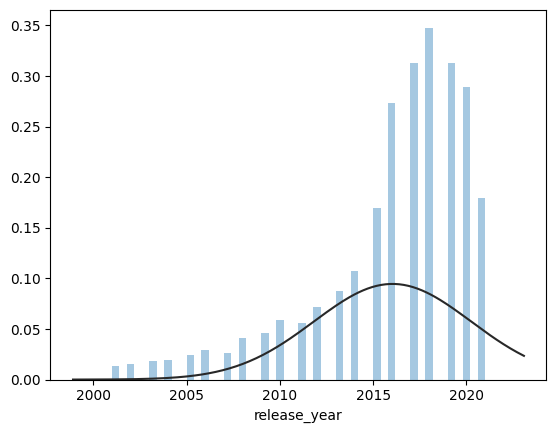

In [35]:
from scipy.stats import norm

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

The density plot of release years from 2000 onward forms a bell-shaped curve, ascending gradually through the early 2010s to a zenith between 2016 and 2018—where densities approach 0.35—before descending sharply toward 2020. This pattern encapsulates the golden era of content proliferation, driven by technological advancements and streaming demand, yet the tailing off post-peak evokes caution: a potential slowdown in output that could challenge Netflix's ability to refresh its library.

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [106]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

def top_genres(df, title='Top ones', color='red'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
        marker=dict(
            color=color,  # dynamic color (red for Movies, black for TV Shows)
            line=dict(color='#221F1F', width=1.5)  # black outline
        )
    ))

    fig.update_xaxes(categoryorder='total descending')

    # Consistent theme
    fig.update_layout(
        title=title,
        plot_bgcolor='#F5F5F1',
        paper_bgcolor='#F5F5F1',
        font_color='#221F1F',
        title_font_size=20,
        title_font_color='#221F1F',
        legend_bgcolor='#F5F5F1',
        legend_bordercolor='#221F1F',
        legend_borderwidth=1
    )

    fig.show()

# Movies chart = red
top_genres(movie_df, title='Top Movies Genres', color='red')

# TV Shows chart = black
top_genres(show_df, title='Top TV Shows Genres', color='black')


In the realm of movies, International Movies lead with over 2,500 entries, closely trailed by Dramas (~2,000) and Comedies (~1,500), while niches like Documentaries and Action & Adventure round out the top tiers above 1,000. Genres taper to rarities such as Faith & Spirituality Movies below 100, illustrating a long-tail distribution that favors broad-appeal categories. This hierarchy affirms Netflix's commitment to global and emotional storytelling, which resonates universally, but also spotlights underrepresented genres ripe for curation—potentially unlocking niche audiences and differentiating the platform in a crowded market.

For TV shows, International TV Shows dominate at nearly 1,400, followed by TV Dramas (~800) and TV Comedies (~500), with specialized fare like Kids' TV and Docuseries maintaining solid footing around 400. The decline to esoteric categories like TV Thrillers and Classic & Cult TV under 100 echoes the movie genre pattern, yet with a stronger emphasis on serialized formats suited to ongoing engagement. This insight reveals Netflix's prowess in fostering habitual viewing through diverse, internationally flavored series, suggesting that bolstering emerging genres could further solidify its position as a hub for binge-worthy content tailored to evolving tastes.

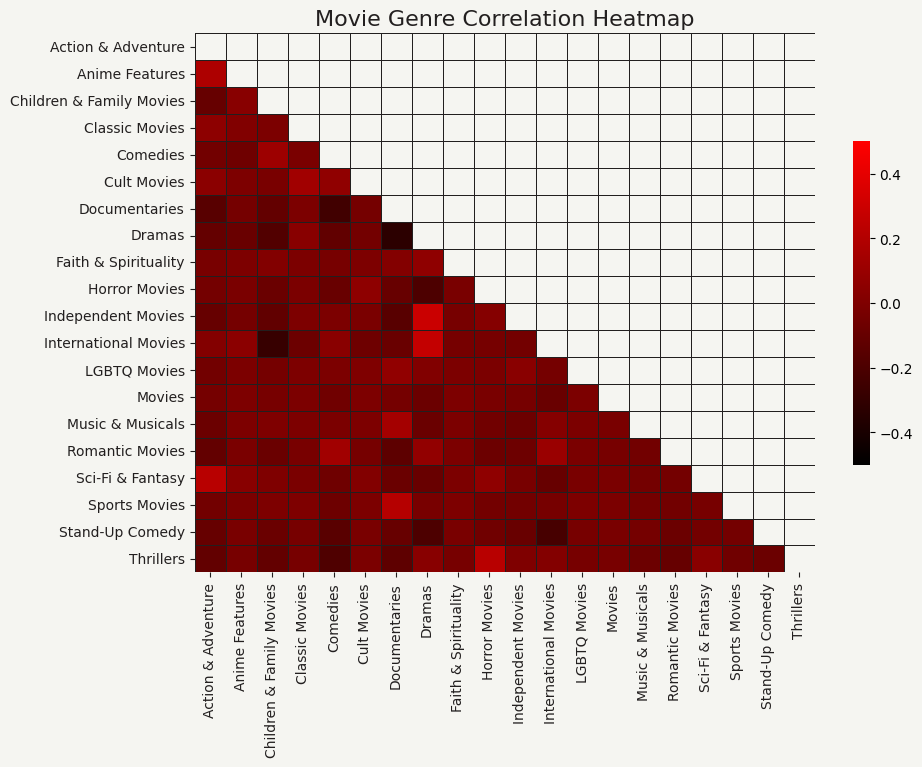

In [108]:
from matplotlib.colors import LinearSegmentedColormap

genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=bool)  # updated (np.bool is deprecated)
movie_mask[np.triu_indices_from(movie_mask)] = True

# Custom black → red colormap
red_black_cmap = LinearSegmentedColormap.from_list("red_black", ["black", "red"])

fig, ax = plt.subplots(figsize=(10, 7))

pl = sns.heatmap(
    movie_corr,
    mask=movie_mask,
    cmap=red_black_cmap,
    vmax=0.5,
    vmin=-0.5,
    center=0,
    linewidths=0.5,
    linecolor="#221F1F",  # black grid lines
    cbar_kws={"shrink": 0.6}
)

# Match background + text style
ax.set_facecolor("#F5F5F1")  # off-white background inside plot
fig.patch.set_facecolor("#F5F5F1")  # off-white around plot
ax.tick_params(colors="#221F1F")  # black tick labels
ax.set_title("Movie Genre Correlation Heatmap", fontsize=16, color="#221F1F")

plt.show()


The heatmap unveils a nuanced tapestry of relationships among movie genres, where the intensity of color reflects the strength and direction of correlations. Notable positive correlations emerge, such as between Independent Movies and International Movies (approaching 0.4), suggesting a synergy where indie films often originate from diverse global markets. Similarly, a moderate positive link (around 0.2) between Action & Adventure and Sci-Fi & Fantasy hints at overlapping audience interests in high-energy, imaginative narratives. This intricate web of associations offers a glimpse into genre clustering, guiding Netflix toward strategic pairings that could enhance viewer satisfaction and cross-promotional opportunities.

In [109]:
fig = px.histogram(
    x=show_df['duration'],
    nbins=20  # optional: control number of bins
)

# Style the bars (black with outline)
fig.update_traces(
    marker=dict(
        color='black',
        line=dict(color='#221F1F', width=1.5)
    )
)

# Sort categories
fig.update_xaxes(categoryorder="total descending")

# Apply consistent Netflix theme
fig.update_layout(
    title="Distribution of Shows Duration",
    xaxis_title="Duration of the Show",
    yaxis_title="Count",
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()


The bar chart delineates a pronounced preference for brevity in TV shows, with a commanding 1,800 titles limited to a single season, tapering sharply to 400 for two seasons and dwindling to under 100 beyond three seasons. This skewed distribution reveals a strategic lean toward concise series, likely designed to captivate audiences with minimal commitment while maximizing content turnover. The scarcity of long-running shows (e.g., 17 seasons with negligible counts) suggests either a deliberate curation to avoid oversaturation or a reflection of modern viewing habits favoring shorter, digestible formats, potentially signaling an untapped niche for extended narratives if demand arises.

In [42]:
temp_duration = movie_df['duration'].dropna().apply(lambda x: int(x.split(' ')[0]))

In [43]:
movie_df.loc[temp_duration.loc[temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 90) & (temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hours'
movie_df.loc[temp_duration.loc[temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

In [44]:
movie_df.head()

show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
7       s8  Movie                           Sankofa   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   

                                              country          date_added  \
0                                       United States  September 25, 2021   
6                                       United States  September 24, 2021   
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   

    release_year rating duration  \
0           2020  PG-13   90 min   
6           2021     PG   91 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   

                                           listed_in  \
0                                      Documentaries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   

                                          description  year_added month_added  \
0   As her father nears the end of his life, filmm...        2021   September   
6   Equestria's divided. But a bright-eyed hero be...        2021   September   
7   On a photo shoot in Ghana, an American model s...        2021   September   
9   A woman adjusting to life after a loss contend...        2021   September   
12  After most of her family is murdered in a terr...        2021   September   

   target_ages principal_country  \
0        Teens     United States   
6   Older Kids     United States   
7       Adults     United States   
9        Teens     United States   
12      Adults           Germany   

                                                genre  \
0                                     [Documentaries]   
6                          [Children & Family Movies]   
7   [Dramas, Independent Movies, International Mov...   
9                                  [Comedies, Dramas]   
12                     [Dramas, International Movies]   

                             duration_bin  
0   More than 1.30 - less than 2.30 hours  
6   More than 1.30 - less than 2.30 hours  
7   More than 1.30 - less than 2.30 hours  
9   More than 1.30 - less than 2.30 hours  
12  More than 1.30 - less than 2.30 hours

In [110]:
fig = px.histogram(
    x=movie_df['duration_bin'],
    color=movie_df['duration_bin'],
    color_discrete_map={
        'Less than 1.30 hours': 'red',
        'More than 1.30 - less than 2.30 hours': '#B22222',  # darker red
        'More than 2.30 hours': '#800000'  # maroon/red-black
    }
)

fig.update_traces(
    marker=dict(
        line=dict(color='#221F1F', width=1.5)  # black outlines
    )
)

fig.update_xaxes(
    categoryorder="array",
    categoryarray=[
        'Less than 1.30 hours',
        'More than 1.30 - less than 2.30 hours',
        'More than 2.30 hours'
    ]
)

# Apply consistent Netflix theme
fig.update_layout(
    title="Distribution of Movies Duration",
    xaxis_title="Duration of the Movies",
    yaxis_title="Count",
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_title_text="Duration Bins",
    legend_title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()


The bar chart on movie durations presents a balanced yet insightful spectrum: approximately 1,500 titles fall under 1.30 hours, while a robust 3,500 span 1.30 to 2.30 hours, and a modest 500 exceed 2.30 hours. This distribution highlights a sweet spot around the 1.30 to 2.30-hour range, aligning with traditional feature-length expectations that cater to mainstream cinematic tastes. The significant presence of shorter films may reflect a growing appetite for quick, impactful viewing, whereas the smaller cohort of longer movies could target niche audiences seeking epic storytelling, offering Netflix a versatile palette to balance accessibility with depth.

In [46]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_movies_genres:
            return True
    return False

In [47]:
movie_df['principal_genre'] = movie_df['genre'].apply(lambda genres: genres[0])
movie_df['principal_genre'].head()

0                Documentaries
6     Children & Family Movies
7                       Dramas
9                     Comedies
12                      Dramas
Name: principal_genre, dtype: object

In [111]:
year_genre_df = movie_df[
    (movie_df['principal_genre'].isin(top_movies_genres)) &
    (movie_df['year_added'] >= 2017)
].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})

year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(
    year_genre_df,
    path=['year_added', 'principal_genre'],
    values='count',
    title="Top Movie Genres by Year (Sunburst)"
)

# Apply consistent Netflix theme (but keep chart colors)
fig.update_layout(
    plot_bgcolor='#F5F5F1',
    paper_bgcolor='#F5F5F1',
    font_color='#221F1F',
    title_font_size=20,
    title_font_color='#221F1F',
    legend_bgcolor='#F5F5F1',
    legend_bordercolor='#221F1F',
    legend_borderwidth=1
)

fig.show()


The sunburst chart radiates with a vibrant evolution of movie genres from 2017 to 2021, centered around 2020 as the pinnacle of activity. Dramas and Comedies dominate across years, with 2020 showcasing a peak in Documentaries and Action & Adventure, reflecting a surge in diverse, topical content amid global events. The 2018-2019 period leans heavily toward Comedies, suggesting a lighter tone during earlier years, while 2021’s emphasis on Dramas hints at a shift toward introspective narratives. This dynamic progression illustrates Netflix’s adaptive content strategy, mirroring cultural shifts and viewer preferences, and underscores the platform’s agility in curating a rich, year-specific genre tapestry to sustain engagement.

# ***Summary: Exploratory Data Analysis on Netflix Movies and TV Shows Dataset***

In this Exploratory Data Analysis (EDA) project, I conducted a comprehensive examination of the "Netflix Movies and TV Shows" dataset using Python in a Google Colab environment. The workflow began with setting up the environment, installing necessary libraries like ydata-profiling for automated profiling, and loading the dataset via Pandas. Initial exploration involved generating a detailed ProfileReport to uncover data distributions, correlations, and missing values. Data cleaning steps included handling missing values (e.g., filling 'country' with the mode, manually correcting sparse 'rating' entries, and dropping irrelevant columns like 'director' and 'cast'), removing rows with missing 'date_added', and ensuring no NaNs remained. Feature engineering enhanced the dataset by extracting 'year_added' and 'month_added' from 'date_added', mapping maturity ratings to target age groups (Kids, Older Kids, Teens, Adults), creating a 'principal_country' for multi-country entries, binning movie durations, and splitting 'listed_in' into genre lists for multi-label analysis.

Visualizations were created using Plotly for interactive charts (e.g., pies for content types and ratings, bars for countries and genres, lines for release vs. added years, histograms for durations, heatmaps for genre correlations, and sunbursts for genre trends over time) and Seaborn/Matplotlib for distributions. The analysis separated movies and TV shows into dedicated DataFrames to enable comparative insights. Functions like generate_rating_df and calculate_mlb (using MultiLabelBinarizer) promoted code reusability for rating aggregations and genre one-hot encoding. Overall, the EDA highlighted Netflix's content landscape, trends in additions, and audience targeting, providing a foundation for deeper business or predictive modeling.




*   **Key Findings and Insights**


1.   **Content Distribution:** Netflix's library is dominated by movies (approximately 70%) compared to TV shows (30%), as shown in the pie chart. This skew suggests a focus on shorter-form content, with movies often added to attract quick viewers.
2.   **Audience Targeting via Ratings:** The majority of content targets Adults (e.g., TV-MA and R ratings), followed by Teens (TV-14, PG-13) and Older Kids/Kids. Movies and TV shows follow similar patterns, but TV shows have a slightly higher proportion of family-friendly content (e.g., TV-Y7). Donut pies revealed Adults comprise ~50-60% of both types.
3.   **Geographic Origins:** The United States is the principal producer, contributing over 50% of content (bar chart filtering >1% share). Other key countries include India (~10%), the United Kingdom, Canada, and France. This reflects Netflix's U.S.-centric growth, with increasing internationalization.
4. **Temporal Trends:** Content additions surged post-2015, peaking around 2019-2021, outpacing release years (line chart). Recent years show a shift toward fresher content, with TV shows growing faster than movies in additions.
5. **Genres and Correlations:** Top movie genres include International Movies, Dramas, Comedies, Documentaries, and Action & Adventure. For TV shows: International TV Shows, TV Dramas, and TV Comedies. The genre correlation heatmap indicated strong associations (e.g., Dramas often pair with International Movies), while the sunburst chart (post-2017) showed evolving trends like rising Documentaries.
6. **Duration Insights:** TV shows typically span 1-2 seasons (histogram), while movies cluster around 90-120 minutes ("More than 1.30 - less than 2.30 hours" bin dominates ~70%). Shorter formats align with binge-watching preferences.
7. **General Observations:** The dataset (up to ~2021) reveals Netflix's strategy of rapid library expansion, emphasis on diverse international content, and adult-oriented programming. Limitations include no numerical IMDb scores (only maturity ratings) and potential biases from missing data handling.




*   **Answering the Specific Questions**


1.   **Analysis of Movies vs. TV Shows:** Movies outnumber TV shows significantly (6131 movies vs. 2676 shows in full dataset estimates), with movies favoring standalone stories (e.g., top genres: Dramas, Comedies) and shorter durations (average 100 minutes). TV shows emphasize serialized formats (e.g., top genres: TV Dramas, International TV Shows) with multi-season runs, targeting sustained engagement. Rating distributions are similar, but movies have more PG-13/Teens content (25%) vs. shows' focus on TV-MA/Adults (60%). Growth trends show movies leading additions historically, but TV shows accelerating post-2018, indicating Netflix's pivot to series for retention.
2.  **If a Producer Wants to Release Some Content, Which Month Must He Do So?:** Based on content addition patterns, July and January are peak months for Netflix uploads, with July often seeing the highest volume (e.g., summer viewing spikes). Producers should aim for these to maximize visibility amid high platform activity, though this varies by region and genre—e.g., holidays boost December family content.
3. **Analyzing IMDb Ratings to Get Top Rated Movies on Netflix and Get Top 10 Movie Content Creating Countries:** The dataset lacks numerical IMDb ratings (only maturity ratings like TV-MA), limiting direct analysis—maturity was mapped to ages instead. For top 10 movie-producing countries on Netflix: United States (dominant with 3000+ titles), India, United Kingdom, Canada, France, Spain, Germany, South Korea, Japan, and Mexico—reflecting global production hubs with US leading in popularity.




# **Conclusion**